In [3]:
import sys
print(sys.executable)

e:\Flight_Fare_Prediction\venv\python.exe


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r'E:\Flight_Fare_Prediction\notebooks\data\Data_Train.csv')

In [6]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
# getting 5 random sample
data.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6209,Jet Airways,06/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,23:00,14h 5m,1 stop,No info,16736
3536,Air India,27/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753
4838,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:00,11h,1 stop,No info,12192
965,SpiceJet,15/04/2019,Kolkata,Banglore,CCU → BLR,06:55,09:30,2h 35m,non-stop,No check-in baggage included,3841
9318,IndiGo,3/05/2019,Banglore,Delhi,BLR → DEL,00:30,03:25,2h 55m,non-stop,No info,3943


In [9]:
# Checking for missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
### dropping null values as there are 1-2 only
data.dropna(inplace = True)

In [11]:
data.shape

(10682, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### Data Preprocessing

## Column : Date_of_Journey

- From data.info() we get to know that Date_of_Journey is of  object data type, so we are converting it into timestamp.
- Using pandas function : to_datetime
- Not considering year , because the whole data is of same year

In [13]:
## Extracting only day of the date 
data['Day'] = pd.to_datetime(data['Date_of_Journey'], format = "%d/%m/%Y").dt.day 

In [15]:
## Extracting only month of the date 
data['Month'] = pd.to_datetime(data['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
# dropping Date_of_Journey column as we took out the important aspects within it
# axis = 1 as we are dropping column 
data.drop(['Date_of_Journey'], axis = 1, inplace = True)

## Column : Dep_Time

- From Departure Time, we want to extract Hour and Minutes
- Using pandas function : to_datetime
- Then dropping Dep_Time column

In [18]:
## Extracting Hours 
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time'], format ="%H:%M").dt.hour

## Extracting Minutes 
data['Dep_Min'] = pd.to_datetime(data['Dep_Time'], format= "%H:%M" ).dt.minute

In [19]:
## Dropping Dep_Time Column
data.drop(['Dep_Time'], axis = 1 , inplace = True)

In [20]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


## Column : Arrival_Time

- From arrival Time, we want to extract Hour and Minutes, similar to Dep_Time
- The format of 'Arrival_Time' column, have a mix of entries  with and without dates.
- So, creating a function that extracts hour & minutes from Arrival_Time, and then applying function to Arrival_Time to create a new columns with extracted hours & minutes.
- Then dropping Arrival_Time column

In [22]:
## Extracting Hours from Arrival_Time
data['Arr_Hour'] = data['Arrival_Time'].apply(lambda x: pd.to_datetime(x, errors='coerce').hour)

## Extracting Minutes from Arrival_Time
data['Arr_Minute'] = data['Arrival_Time'].apply(lambda x: pd.to_datetime(x, errors='coerce').minute)

In [23]:
## Dropping Arrival_Time Column
data.drop(['Arrival_Time'], axis = 1 , inplace = True)

In [24]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
def extract_duration(duration):
    hours = 0
    minutes = 0

    # Split the string based on space and remove any empty parts
    parts = [part.strip() for part in duration.split()]

    for part in parts:
        if 'h' in part:
            hours += int(part.replace('h', ''))
        elif 'm' in part:
            minutes += int(part.replace('m', ''))
        else:
            # If no 'h' or 'm' is present, consider it as hours
            hours += int(part)

    return hours, minutes

# Creating new columns for hours and minutes
data['Duration_Hour'], data['Duration_Min'] = zip(*data['Duration'].apply(extract_duration))

In [26]:
## Dropping Duration Column
data.drop(['Duration'], axis = 1 , inplace = True)

In [27]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data

## Column : Airline

- It has 12 unique values.

In [28]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

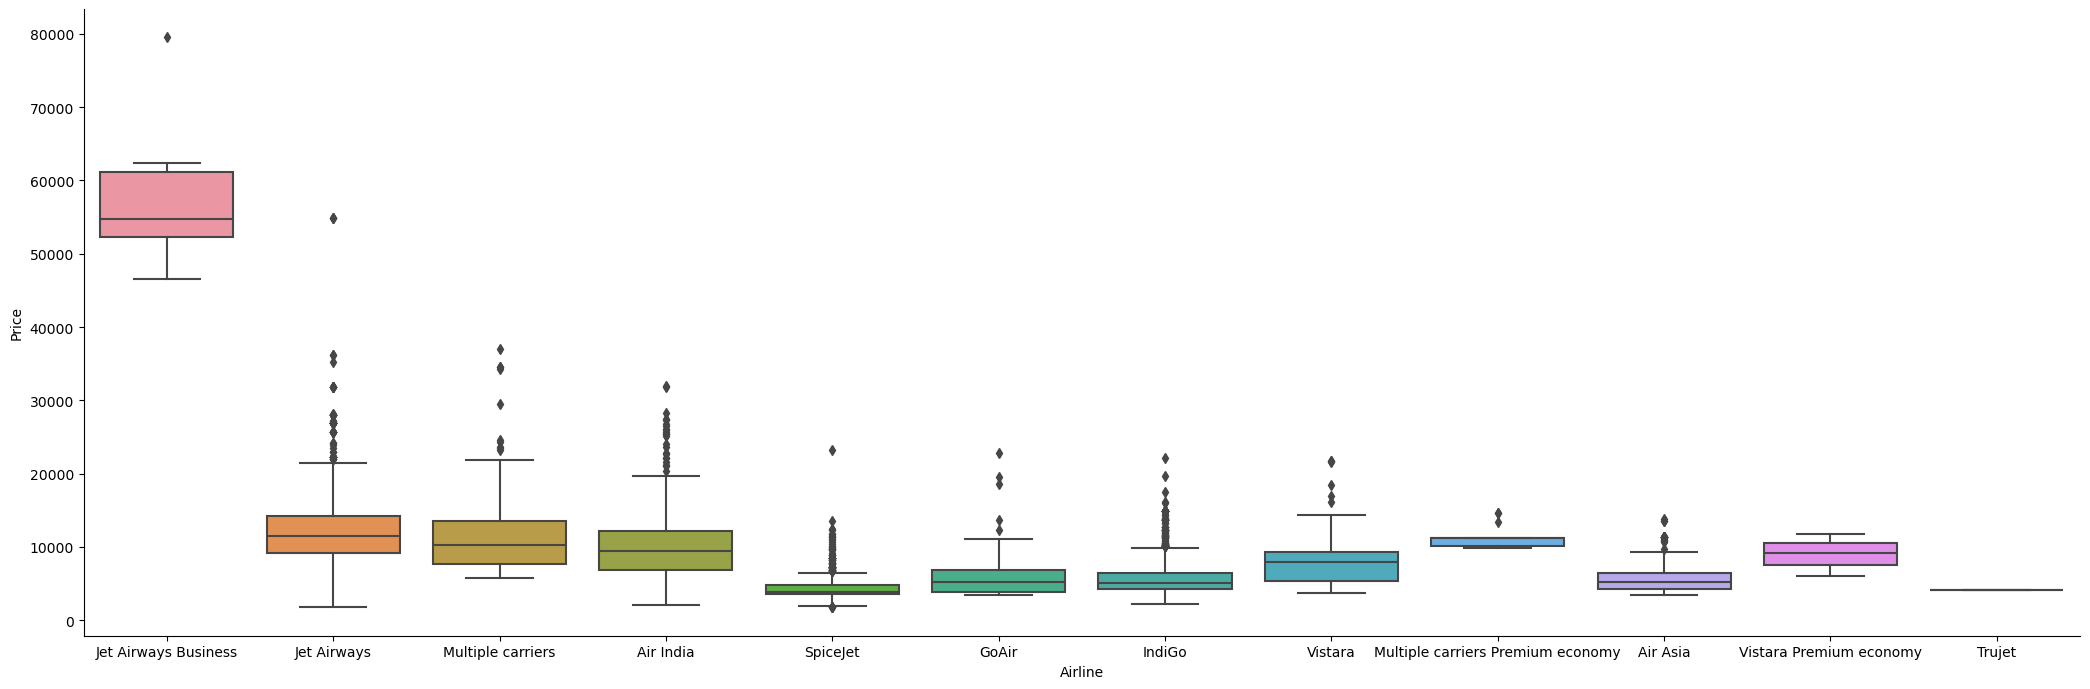

In [29]:
# Airline vs Price

sns.catplot(x = 'Airline', y ='Price', data = data.sort_values("Price", ascending = False), kind = 'box', height = 7, aspect = 3)
plt.show()

- Highest Price value is of Jet Airways Business.
- All other Airlines are having similar median with some outliers.

In [30]:
# Airline Column is like a Nominal Data.
# Performing One hot encoding as Airline data does not have any order.
 
Airline = data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

# drop_first :Dropping one of the features which is not required.

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


- From above column we can see that 1st record it says True for Indigo , because we have Indigo at 1st place in our data.
- Airline : Air Asia has been dropped in above column.

## Column : Source

- There are 5 unique values , which are having multiple records.

In [31]:
data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

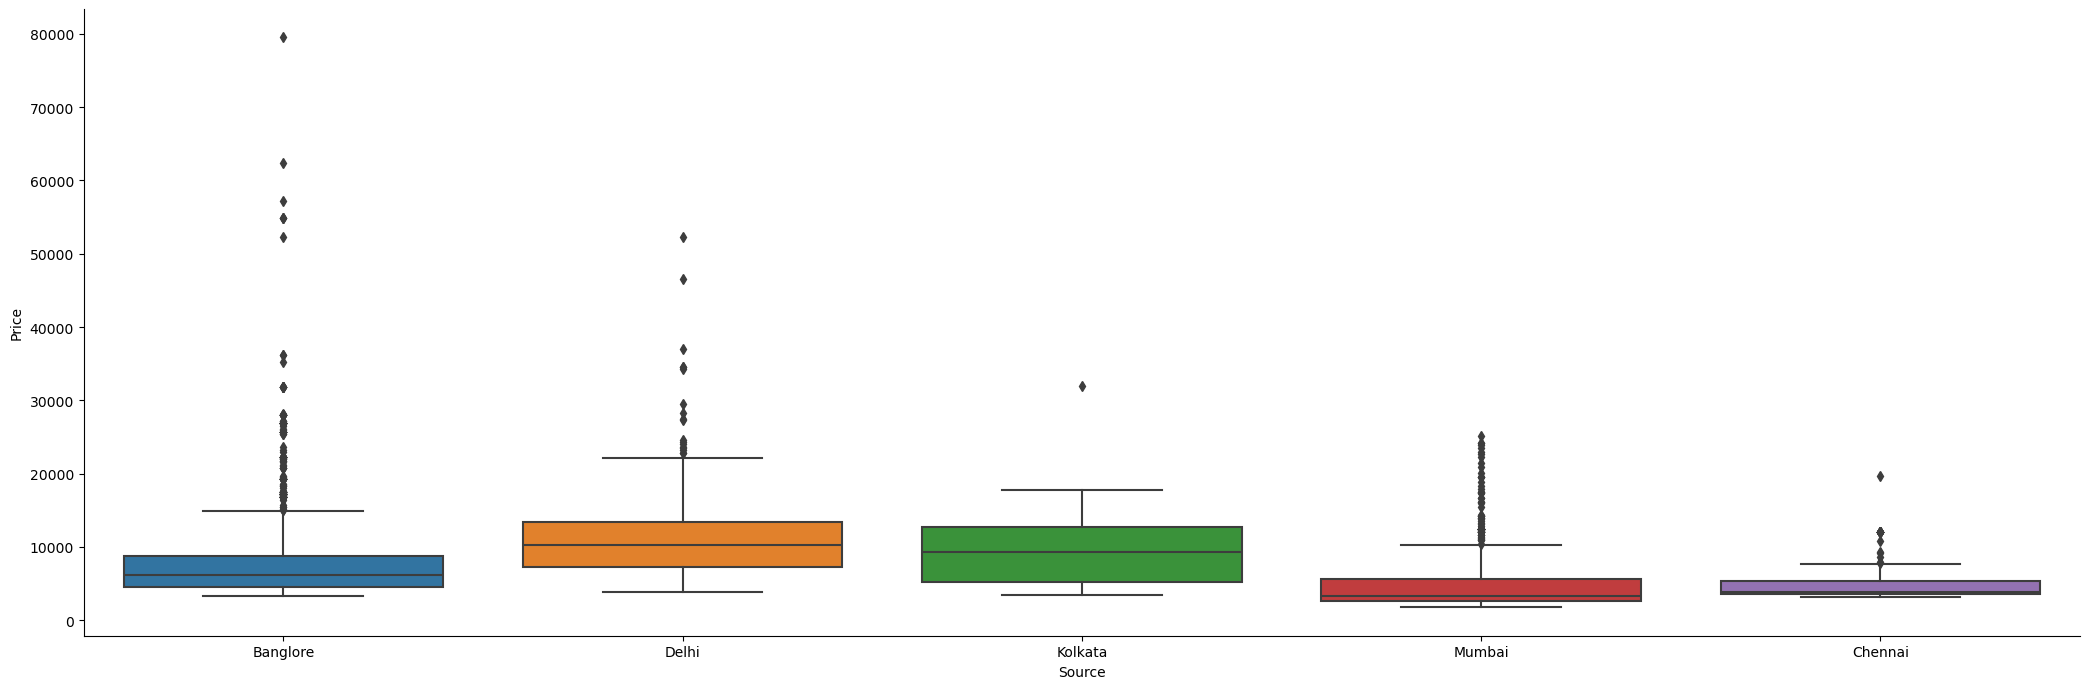

In [32]:
# Source vs Price

sns.catplot(x = 'Source', y ='Price', data = data.sort_values("Price", ascending = False), kind = 'box', height = 7, aspect = 3)
plt.show()

- Banglore feature is having little bit more outlier comparing to other places.
- Even Delhi has some outliers.

In [33]:
# Source Column is like a Nominal Data.
# Performing One hot encoding as Source data does not have any order.
 
Source = data[['Source']]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


- Based on above encoding we can state that for Banglore all other features will have False value.

## Column : Destination

- It has 6 unique values with multiple records.

In [34]:
data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [35]:
# Destination Column is like a Nominal Data.
# Performing One hot encoding as Destination data does not have any order.
 
Destination = data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


- From above output , we can say that second record as Destination which has been drop has all other feature have False value.

## Column : Route

In [36]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

- Route column is similar to Total_Stops column , so dropping Route column will not affect our data

In [37]:
data.drop(['Route'], axis= 1, inplace= True)

## Column : Additional_Info

In [39]:
data['Additional_Info']


0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [40]:
# There actually is no relevant information in this column , so dropping it would not make any change.
data.drop(['Additional_Info'], axis= 1, inplace= True) 

In [41]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


## Column : Total_Stops

- It has 5 features depicting the total stops between source and destination.

In [42]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [43]:
# This is Ordinal Categorical Data type, so here we will perform LabelEncoder.

data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4 }, inplace= True)

In [44]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


- Here we can see Price increases has number of stops increases. More the stops greater the price.

In [45]:
# Combining Dataframe : data + Airline + Source + Destination

train_data = pd.concat([data, Airline, Source, Destination], axis= 1)

In [46]:
train_data

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,...,False,False,False,True,False,False,False,False,False,False
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,...,False,False,False,True,False,False,False,False,False,False
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,...,False,False,False,False,False,False,True,False,False,False
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,...,False,False,False,False,False,False,False,False,False,True


In [47]:
train_data.drop(['Airline', 'Source', 'Destination'], axis= 1, inplace= True)

In [48]:
train_data

,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute,Duration_Hour,Duration_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,False,False,False,True,False,False,False,False,False,False
10679,0,4145,27,4,20,45,23,20,2,35,...,False,False,False,True,False,False,False,False,False,False
10680,0,7229,27,4,8,20,11,20,3,0,...,False,False,False,False,False,False,True,False,False,False
10681,0,12648,1,3,11,30,14,10,2,40,...,False,False,False,False,False,False,False,False,False,True
